In [1]:
import uproot as ur
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
plt.rcParams['legend.frameon']=True
plt.rcParams['legend.edgecolor']='white'

plt.rcParams["figure.figsize"] = (10, 8)

import gc

In [12]:
Energies=np.array([21.475867008531132, 23.85995526436274, 26.244043520194353, 29.10018125068062, 31.956318981166888, 35.29404253933114, 39.108583748661715, 42.923124957992286, 47.214483818489185, 51.9826603301524, 57.22765449298194, 63.426283958144126, 70.10173107447264, 77.25399584196745, 84.87831008411695, 93.45625962859907, 103.46943030309183, 113.95941862875091, 125.40304225674262, 138.27711883823332, 152.58164837322298, 168.3166308617116, 185.48206630369918, 204.55477235035204, 225.5347490016702, 248.89881390882, 274.6469670718013, 302.34038427778796])
energy_offsets_strawman=np.array([-26.957767751336704, -26.017543970758894, -25.33569632929291, -24.24458197992535, -23.694580297878776, -22.937439005297932, -22.064959438878663, -21.591041001508003, -21.01088723137494, -20.47015034346171, -19.915830080229966, -19.222999081796168, -18.83432808066665, -18.225906846859775, -17.950181404544207, -17.51194349775298, -16.997563305942354, -16.627090437387714, -16.38224609669764, -16.03717577257622, -15.758286921028631, -15.405593944899875, -15.437425849620535, -15.448186798810248, -15.698247465555582, -15.949058926729542, -16.25714627382959, -16.925922031140395])
energy_doffsets_strawman=np.array([0.17218713440681896, 0.15408555207857821, 0.20240714057254477, 0.16954173737439315, 0.12683321218772212, 0.15537844517943397, 0.11171064952927455, 0.10814319900973236, 0.1208876323370828, 0.13166697133162245, 0.14182756151710355, 0.1497385373085755, 0.10503814434930084, 0.1382994684869116, 0.12216541346828466, 0.11051240829725063, 0.0837601953767615, 0.07225684945737479, 0.10823104999338601, 0.10736336464132996, 0.07083108596646034, 0.14366955349130087, 0.16490637014957002, 0.17522924354749767, 0.15269957655029215, 0.21725077218865116, 0.1947448677592886, 0.29602261947923353])


In [3]:
from scipy.optimize import curve_fit

chi2= 10.936816774111717
[-3.89945683e-01  8.26619052e-03 -1.51759169e-04  1.63182853e-06
 -1.03191453e-08  3.76130508e-11 -7.30977676e-14  5.85916026e-17]


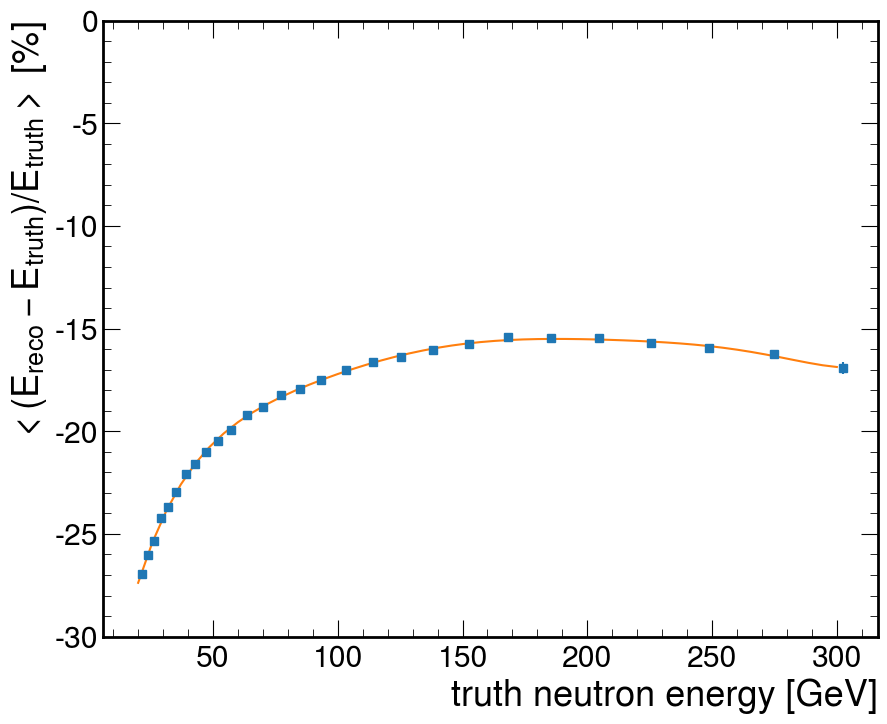

In [42]:
#help(curve_fit)
def poly(x, *c):
    r=c[0]
    for i in range(1,len(c)):
        r=r+c[i]*x**i
    return r
P0=[0,0,0,0,0,0,0,0]
P,cov=curve_fit(poly, Energies, energy_offsets_strawman/100, P0, sigma=energy_doffsets_strawman/100)

plt.errorbar(Energies, energy_offsets_strawman, energy_doffsets_strawman,ls='', marker='s')

chi2=sum((100*poly(Energies,*P)-energy_offsets_strawman)**2/energy_doffsets_strawman**2)
print("chi2=",chi2)

E=np.linspace(20, 300)
pred=100*poly(E,*P)
plt.plot(E, 100*poly(E,*P))

plt.xlabel("truth neutron energy [GeV]")
plt.ylabel("$<(E_{\\rm reco}-E_{truth})/E_{truth}>$ [%]")
plt.ylim(-30, 0)


print(P)


chi2= 10.907645746916375
[-3.68480639e-01  8.95488288e-03 -1.99417974e-04  2.61045407e-06
 -2.00759280e-08  8.88868968e-11 -2.09635369e-13  2.03733253e-16]


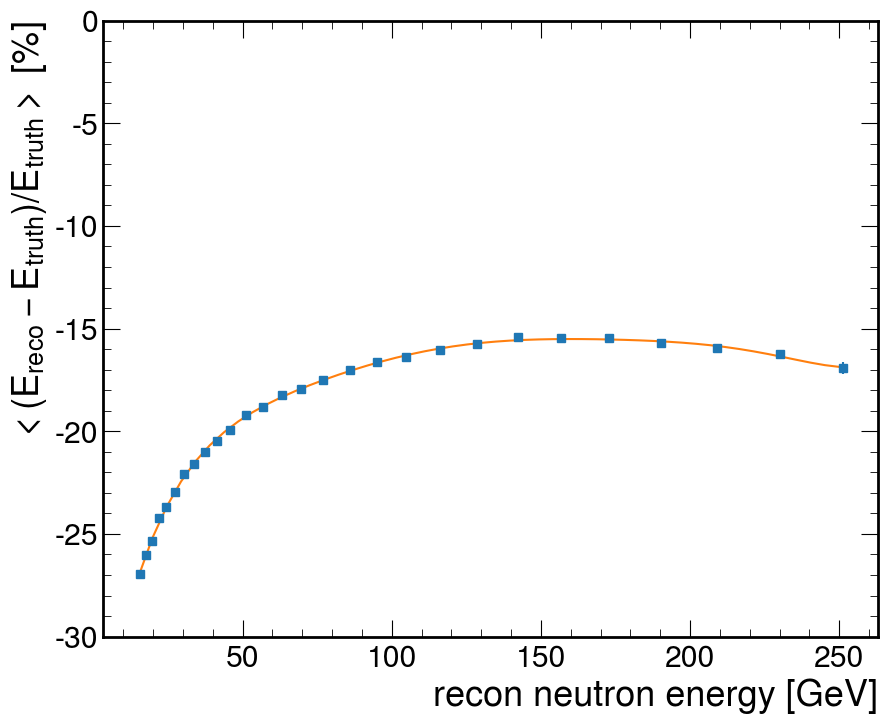

In [54]:
#help(curve_fit)
def poly(x, *c):
    r=c[0]
    for i in range(1,len(c)):
        r=r+c[i]*x**i
    return r
P0=[0,0,0,0,0,0,0,0]
erecon=Energies*(1+energy_offsets_strawman/100)
P,cov=curve_fit(poly, erecon, energy_offsets_strawman/100, P0, sigma=energy_doffsets_strawman/100)

plt.errorbar(erecon, energy_offsets_strawman, energy_doffsets_strawman,ls='', marker='s')

chi2=sum((100*poly(erecon,*P)-energy_offsets_strawman)**2/energy_doffsets_strawman**2)
print("chi2=",chi2)

E=np.linspace(15, 250)
pred=100*poly(E,*P)
plt.plot(E, 100*poly(E,*P))

plt.xlabel("recon neutron energy [GeV]")
plt.ylabel("$<(E_{\\rm reco}-E_{truth})/E_{truth}>$ [%]")
plt.ylim(-30, 0)


print(P)


In [12]:
from scipy.optimize import curve_fit

def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))
#do just the calculation of the resolution
def res_calc(a, fnc=gauss, bins=None, nsigma=2, quantile=None):
    a=np.array(a)
    mean=np.mean(a)
    sigma=np.std(a)
    if bins is None :
        if quantile==None:
            bins = np.linspace(mean-3*sigma,mean+3*sigma, 20)
        else:
            bins = np.linspace(np.quantile(a, quantile),np.quantile(a, 1-quantile), 20)
    h,x=np.histogram(a, bins=bins)
    bc=(x[1:]+x[:-1])/2
    a_in_window=a[(a>=x[0])&(a<=x[-1])]
    p0=[10,np.mean(a_in_window), np.std(a_in_window)*.9]
    slc=np.abs(bc-np.mean(a_in_window))<nsigma*np.std(a_in_window)
    try:
        coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                                 sigma=np.sqrt(h[slc]))
        return abs(coeff[2]),np.sqrt(var_matrix[2][2]),coeff[1], np.sqrt(var_matrix[1][1])
    except:
        return 0, 0,0,0

In [51]:
arrays={}

import uproot as ur
arrays_sim={}

energies=20, 40, 60, 80, 100,120, 140, 160, 200, 230, 260,300
for E in energies:
    for a,b in ["uncorr",f"test_eicrecon_scale_{E}GeV_100events.root"],["corr",f"test_eicrecon_scale_{E}GeV_100events_corr.root"]:
        events = ur.open(f'{b}:events')
        #events = ur.open(f'insert_sim_mu-_18GeV_theta_178-178deg.edm4hep.root:events')
        arrays_sim[(a,E)] = events.arrays()

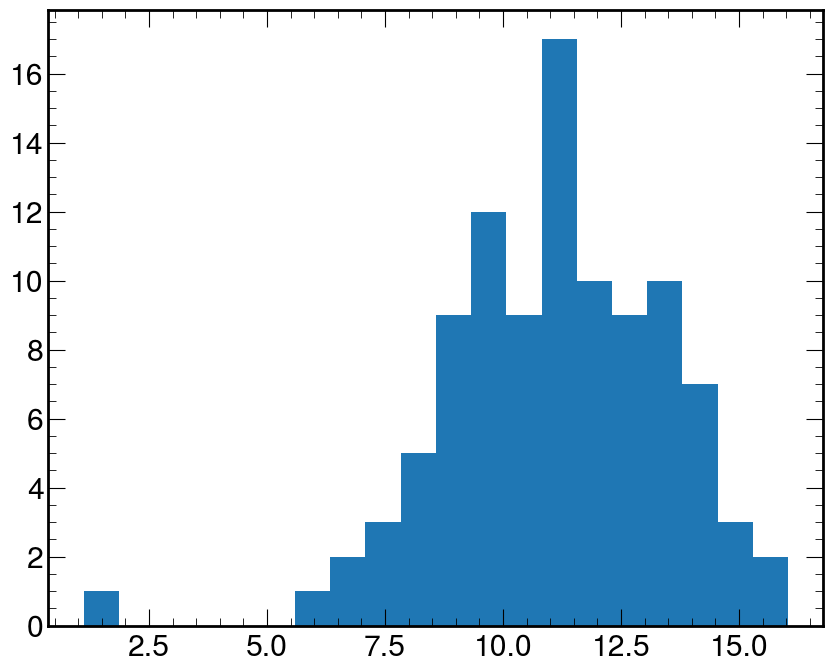

20 0.10759154490335693 0.011921591777978663 -0.44382646240527573 0.012042094081123052


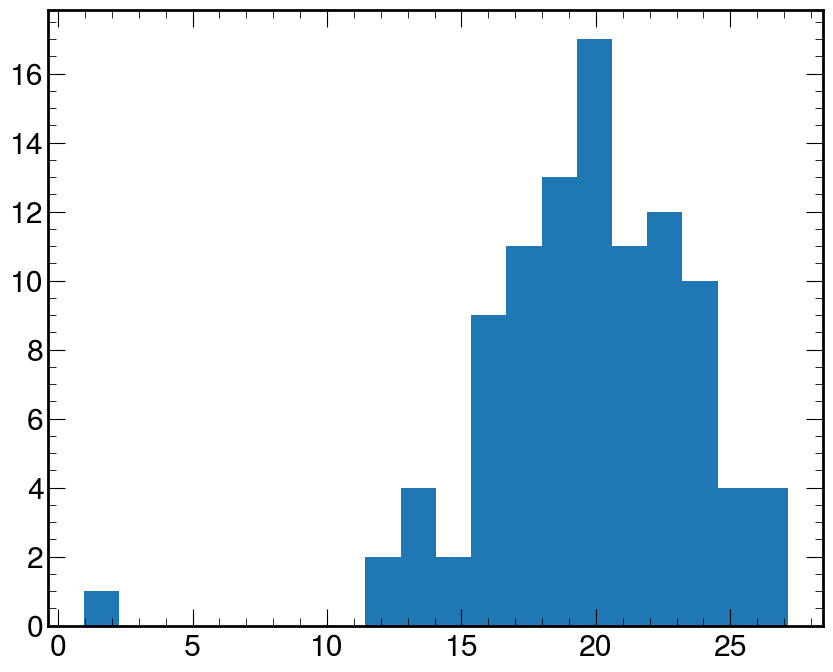

20 0.1651852262809999 0.016831765848479046 0.009288435622939534 0.017525767477283977


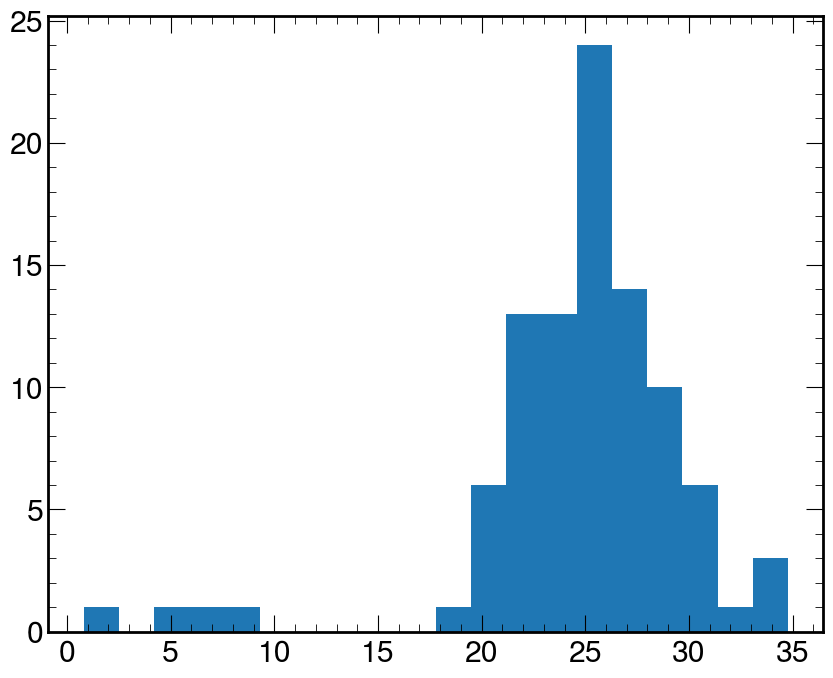

40 0.08042723034384794 0.004243856990672293 -0.36087892979208525 0.004514045620533073


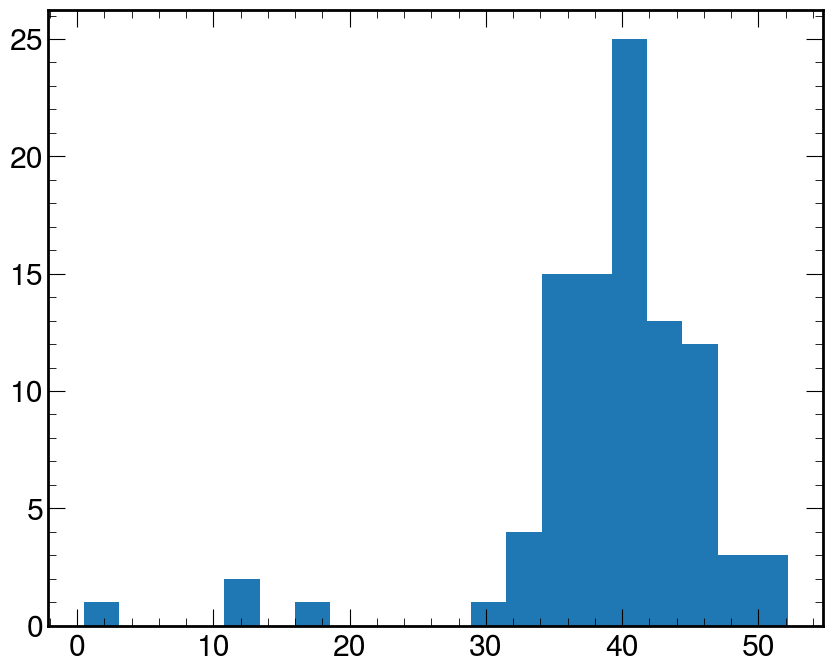

40 0.10087816965109245 0.005372381001898209 0.0025438008167025616 0.006622953758841738


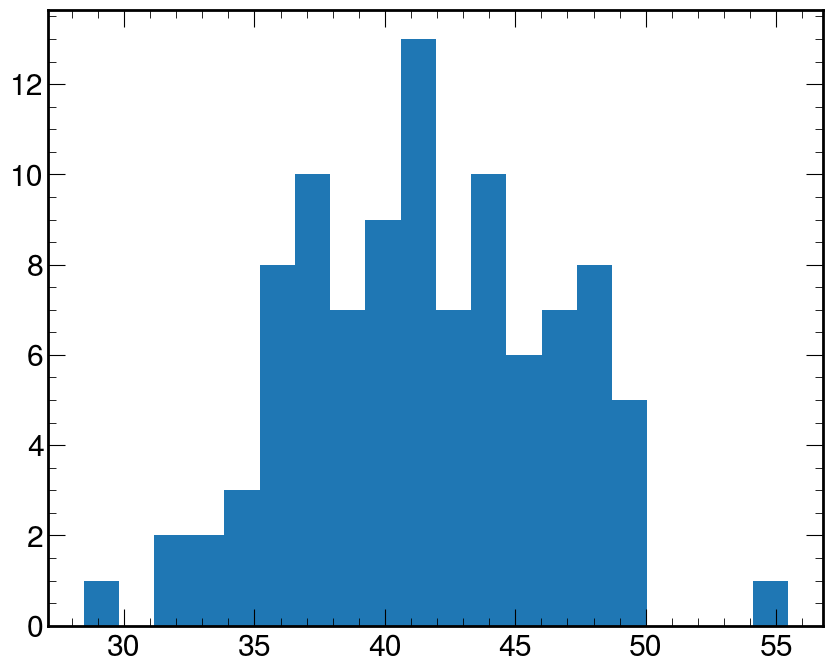

60 0.0719065435230732 inf -0.30818507075309753 inf


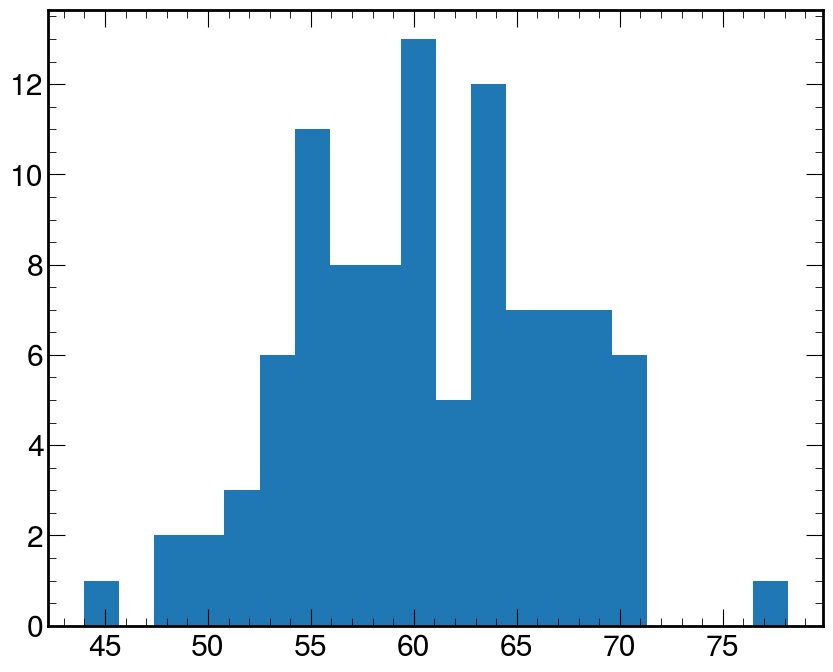

60 0.09101979061961174 inf 0.011893201619386673 inf


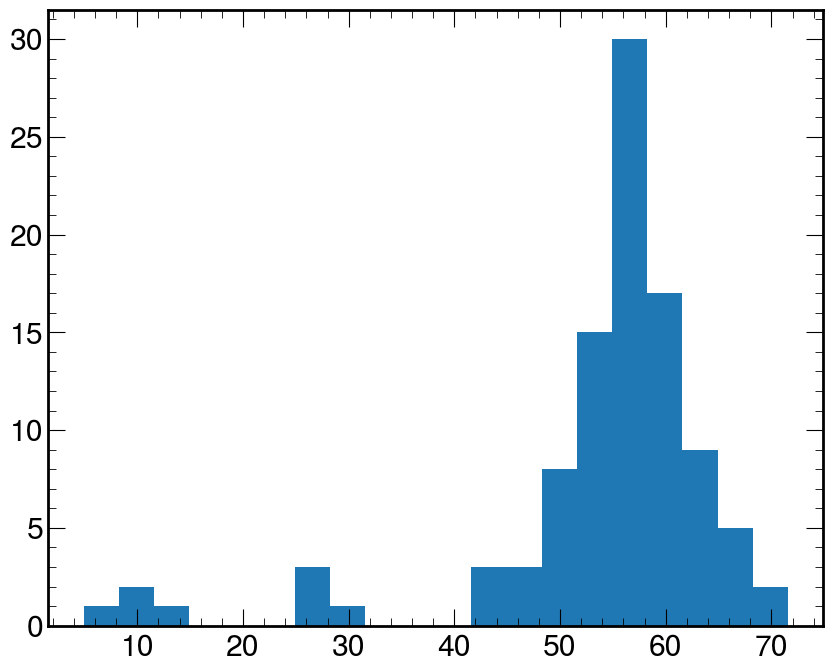

80 0.060530073788084 0.008142011620555108 -0.28895048039123483 0.00935358249971396


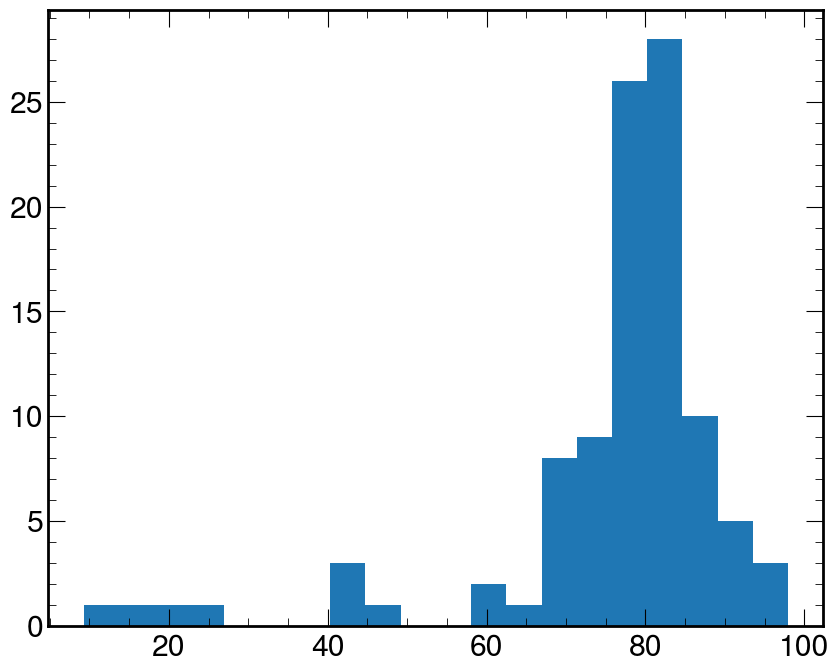

80 0.08085728702968753 0.01062578048354478 0.00040757593452908175 0.01221847996728811


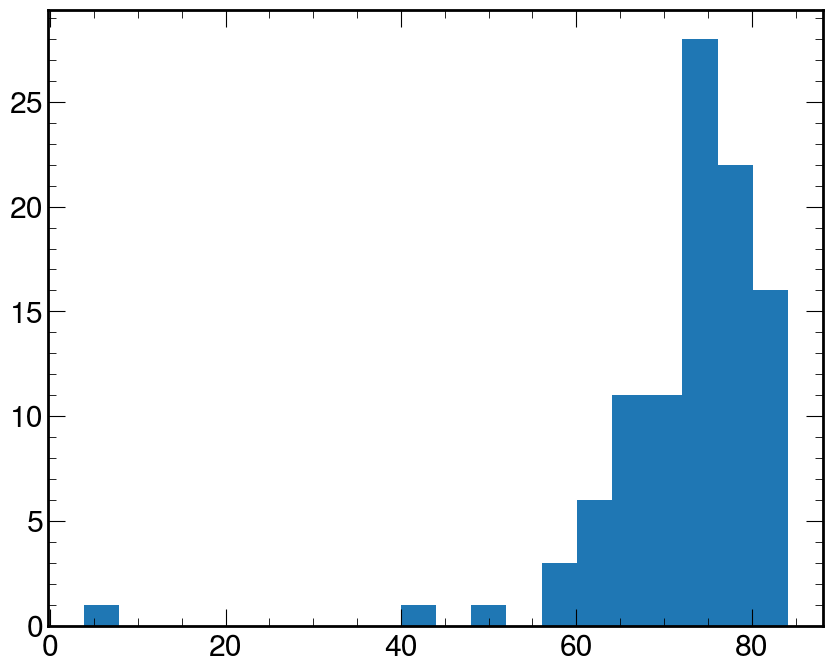

100 0.058290505586330046 0.008881364717773108 -0.2634202398103901 0.011147725785807161


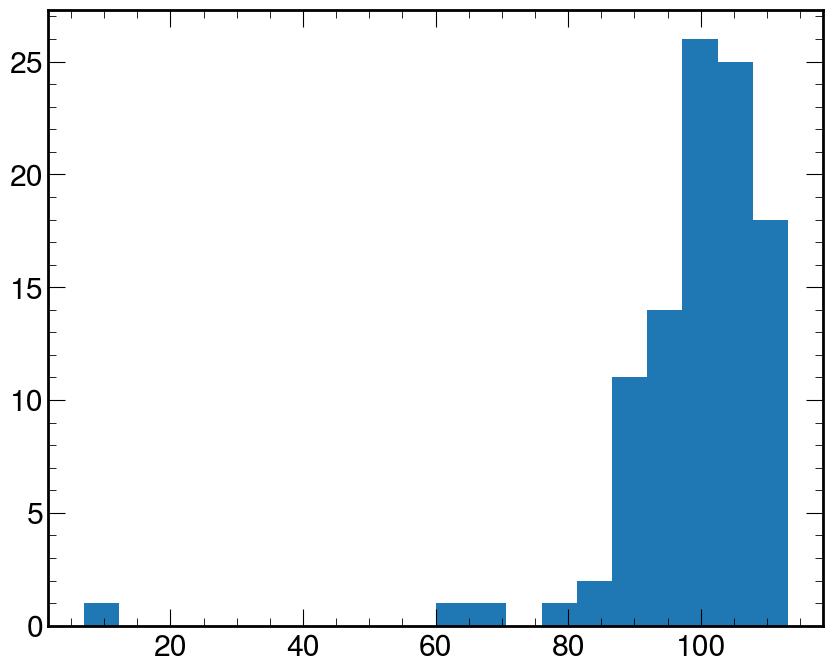

100 0.07071129417950074 0.008064478806161365 0.005347144867339555 0.010159191126279467


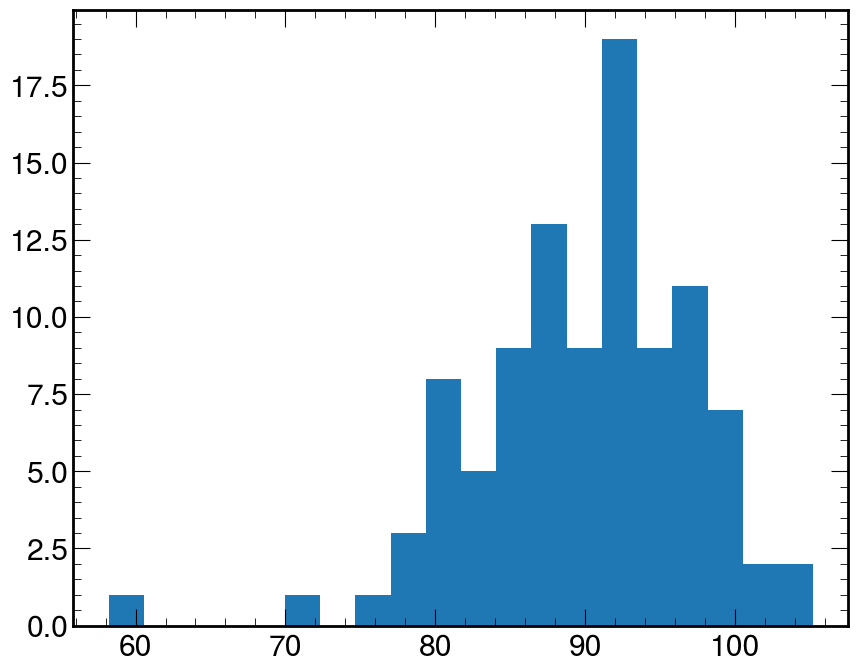

120 0.062411714206691477 0.008834041416949 -0.2452373279212294 0.007957120070106299


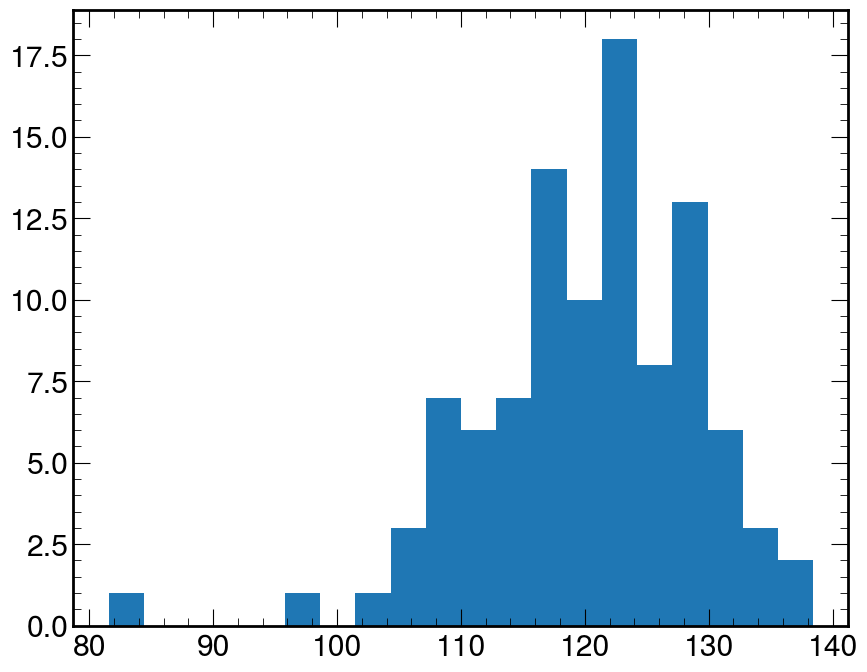

120 0.07209720118130884 0.009595131804615235 0.008386607247269095 0.00885200147941915


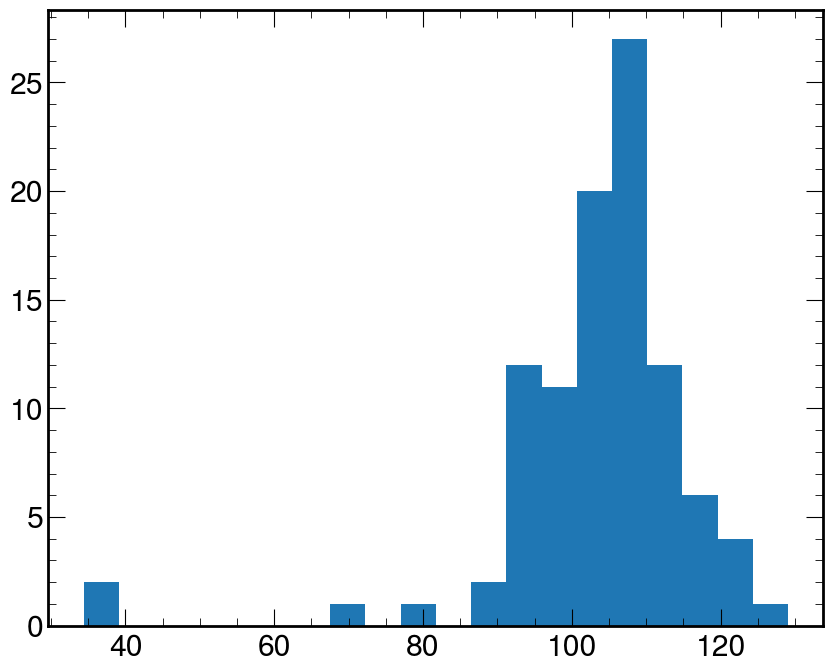

140 0.056375414663651535 0.004204335930666756 -0.25002757320761204 0.004996767550915217


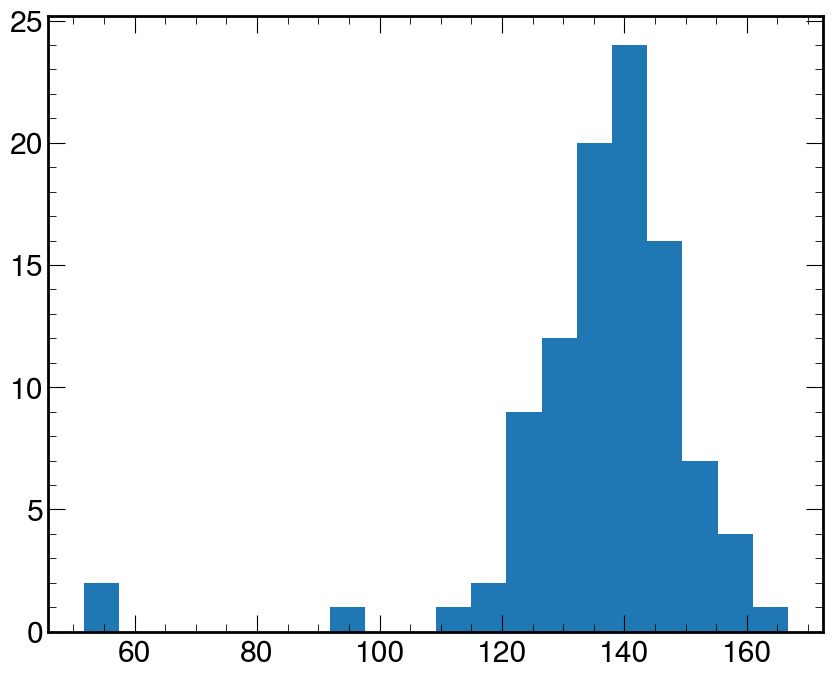

140 0.06820484400165312 0.00566177259799734 -0.014357749243563292 0.006011672608218538


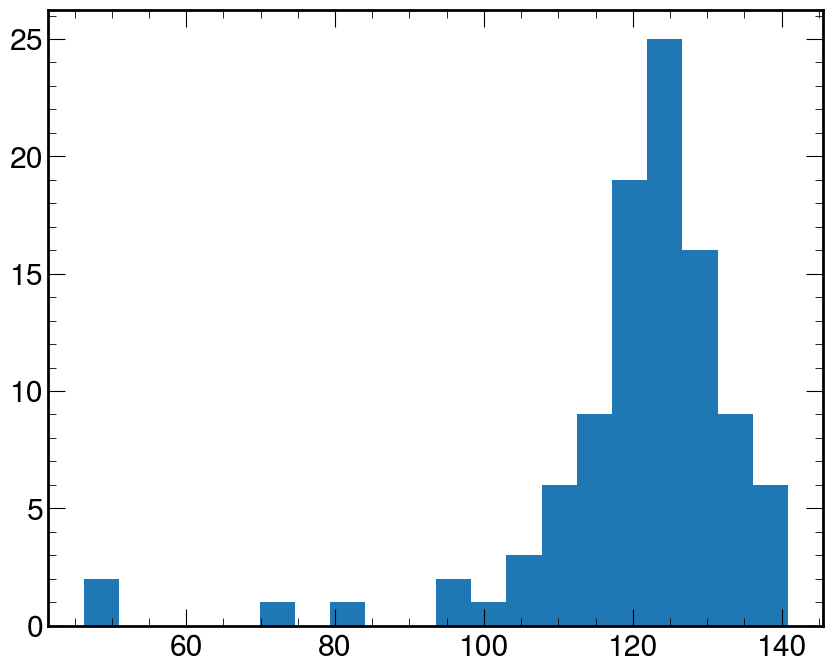

160 0.048608587043962675 0.005294532409227133 -0.2210337135053107 0.005636585780164399


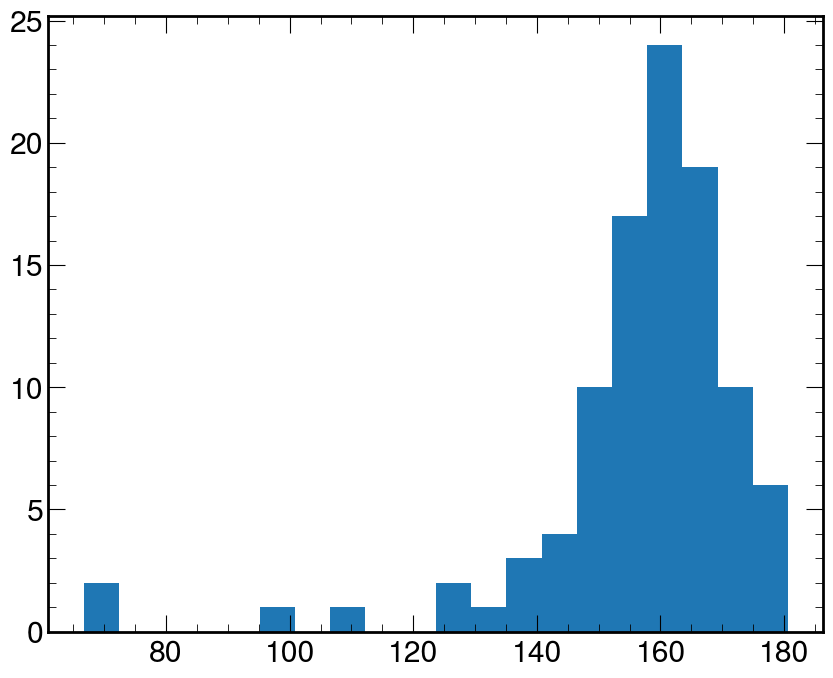

160 0.05662455671651493 0.005820331964863246 0.006822584712652844 0.0063132058604237346


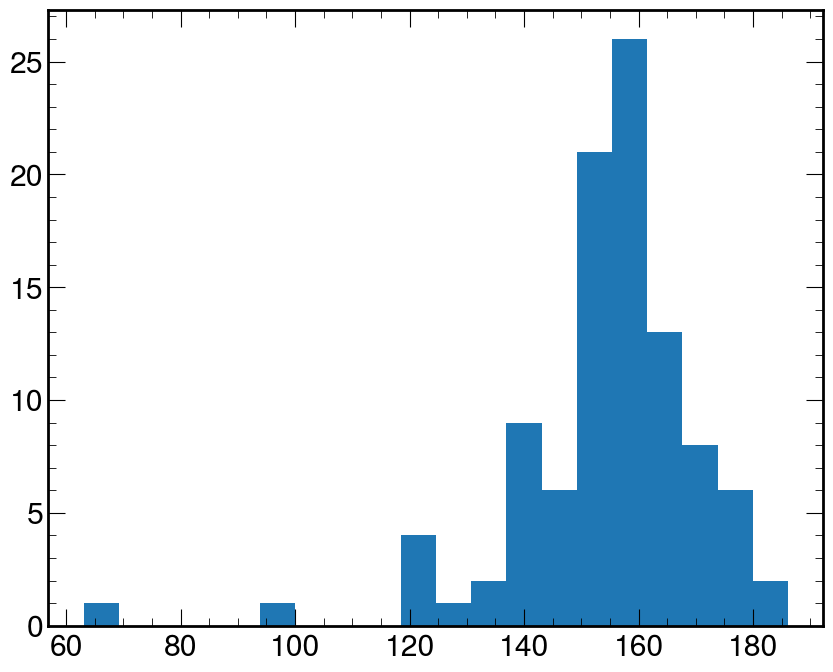

200 0.05130641034062001 0.0034576849211748347 -0.21400212929271484 0.004191517608291038


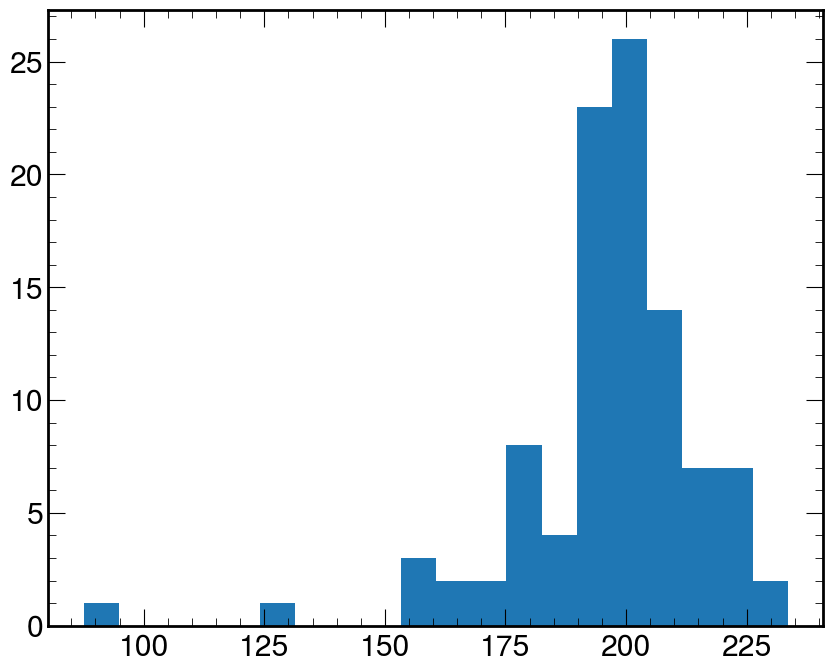

200 0.05987435387403132 0.004054288505552353 -0.0014900365055990365 0.004885067321234007


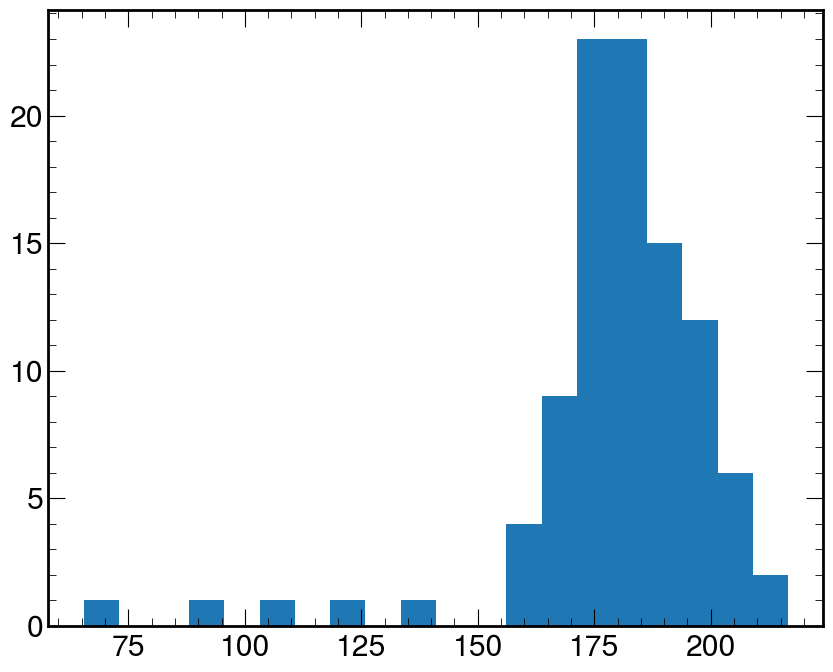

230 0.05112449159590565 0.006108534974074771 -0.20487769458541708 0.006561520603922463


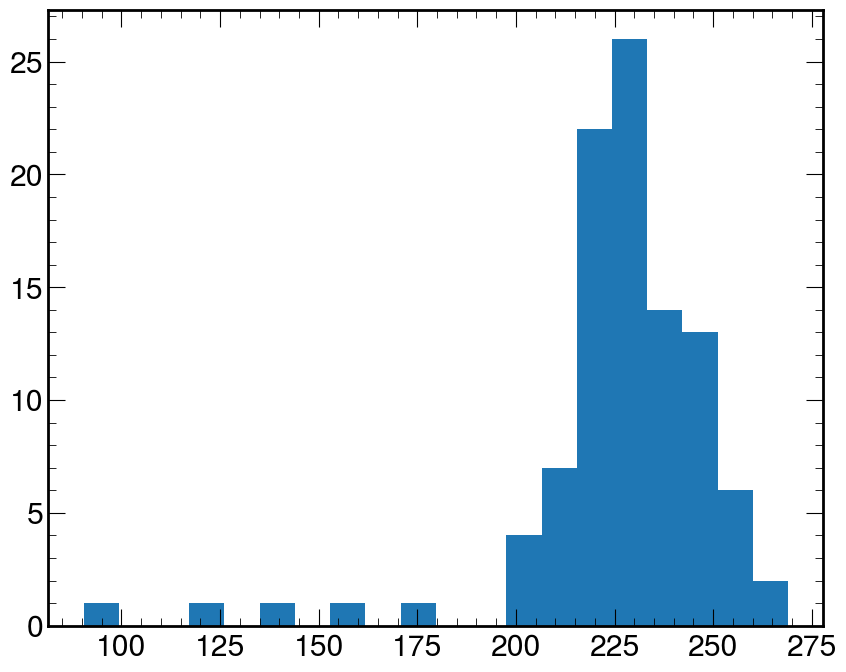

230 0.06012437253927437 0.007183907268391185 -0.0009295287638093054 0.007716623491766351


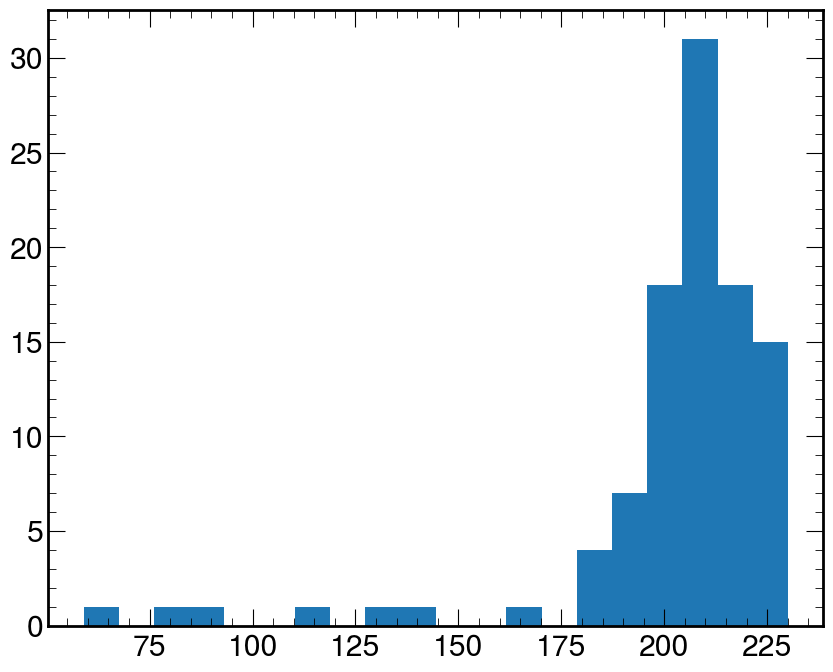

260 0.05570695325732231 inf -0.20424287021160126 inf


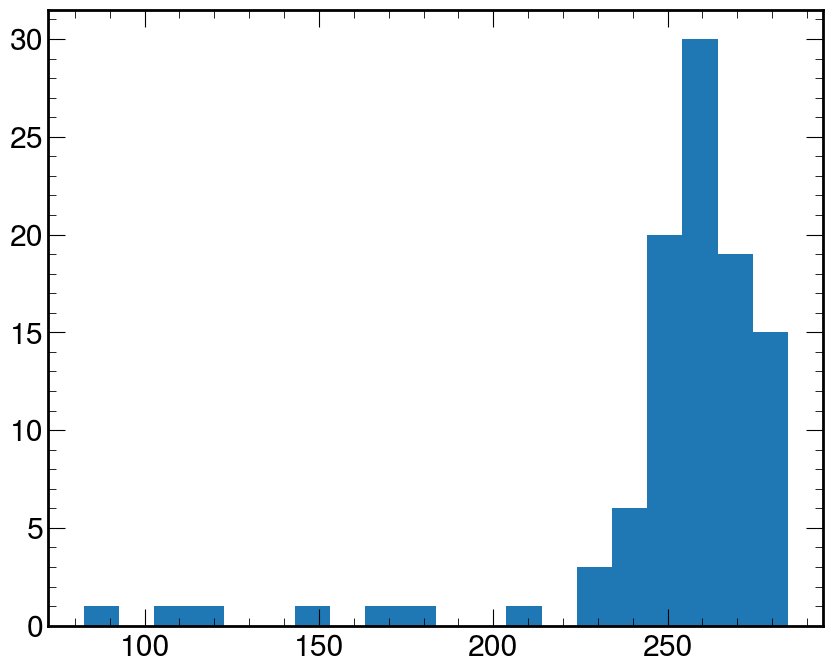

260 0.064847432076931 inf -0.008791965432465076 inf


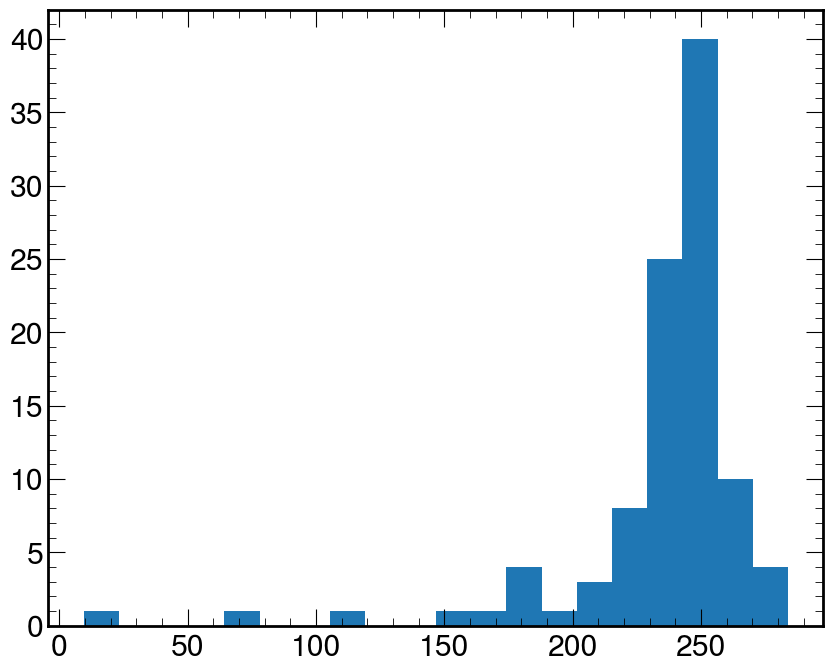

300 0.041537398572673294 0.005527016503039069 -0.183146578348519 0.006237720304043348


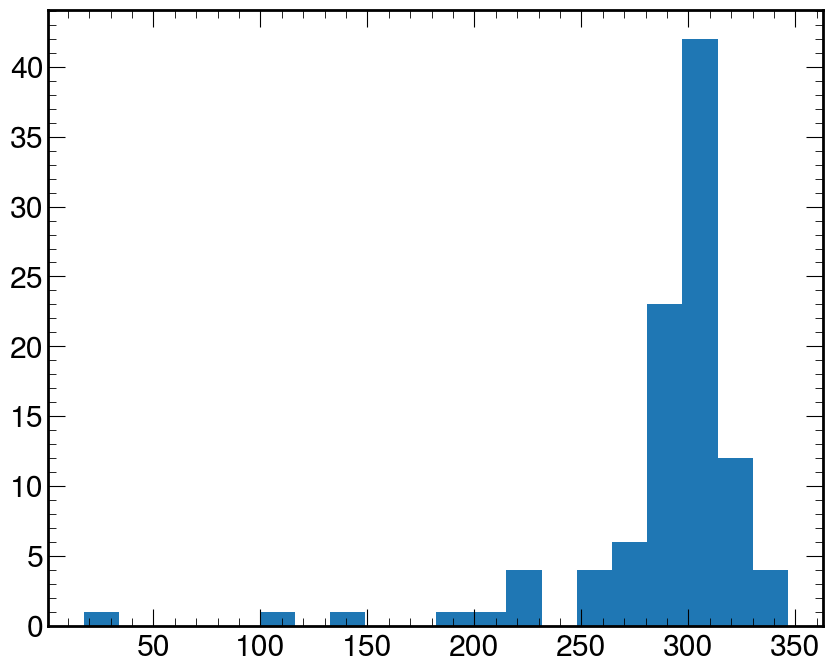

300 0.05281627062229015 0.006777276261267334 0.005009160772400522 0.007515034358319799


In [52]:
import awkward as ak

scales={"uncorr":[], "corr":[]}
dscales={"uncorr":[], "corr":[]}
for E in energies:
    for a in "uncorr","corr":
        #print(arrays_sim[a].fields)
        plt.hist(ak.flatten(arrays_sim[(a,E)]["ReconstructedFarForwardZDCNeutrons.energy"]), bins=20)
        plt.show()
        #x=(x[1:]+x[:-1])/2
       
        s,ds,m,dm= res_calc(ak.flatten(arrays_sim[(a,E)]["ReconstructedFarForwardZDCNeutrons.energy"])/E-1)
        print(E, s,ds,m,dm)
        scales[a].append(m)
        dscales[a].append(dm)
    
    #print(set(ak.flatten(np.sqrt(arrays_sim[a]['MCParticles.momentum.z']**2+0.9406**2))))

[-0.07559018 -1.90582836  2.29862332]


Text(0, 1, '$(E_{recon}-E_{truth})/E_{truth}$')

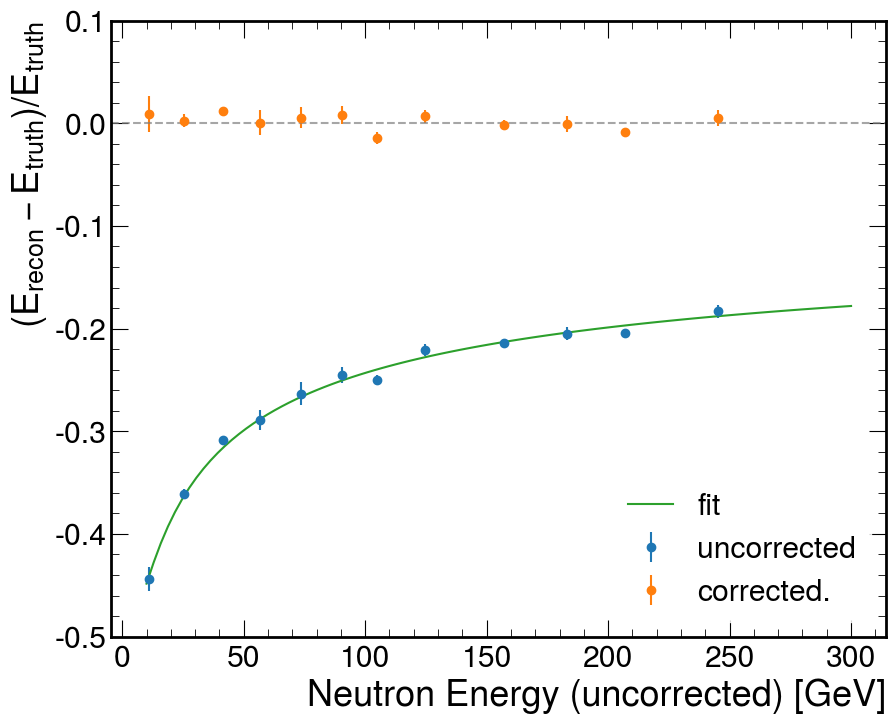

In [60]:
plt.errorbar(energies*(1+np.array(scales['uncorr'])),scales["uncorr"],dscales['uncorr'], marker='o', ls='', label='uncorrected')
plt.errorbar(energies*(1+np.array(scales['uncorr'])),scales["corr"],dscales['corr'], marker='o', ls='', label="corrected.")
fnc=lambda x,a, b,c: a+b/np.sqrt(x)+c/x
P0=[0,0,0]
P,cov=curve_fit(fnc, energies*(1+np.array(scales['uncorr'])),scales["uncorr"],sigma=dscales['uncorr'])
x=np.linspace(10,300, 100)
plt.plot(x, fnc(x, *P), label='fit')
plt.legend()
print(P)
plt.axhline(0, ls="--", color='0.5', alpha=0.7)
plt.ylim(-0.5, 0.1)
plt.xlabel("Neutron Energy (uncorrected) [GeV]")
plt.ylabel("$(E_{recon}-E_{truth})/E_{truth}$")

(-0.3, 0.3)

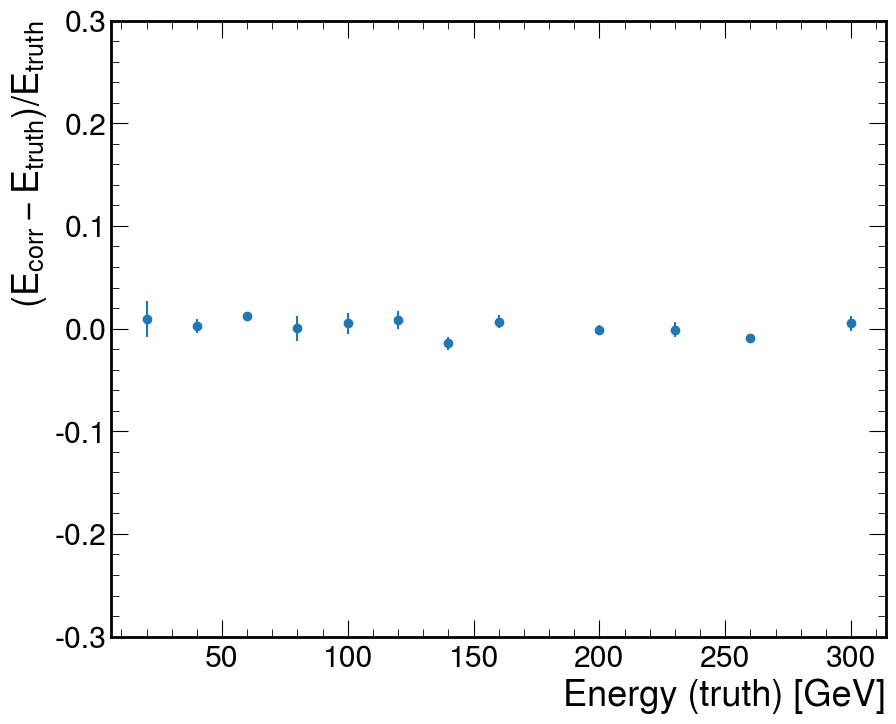

In [54]:
plt.errorbar(energies,scales["corr"],dscales['corr'], marker='o', ls='')
# fnc=lambda x,a, b,c: a+b/np.sqrt(x)+c/x
# P0=[0,0,0]
# P,cov=curve_fit(fnc, energies*(1+np.array(scales['corr'])),scales["corr"],sigma=dscales['corr'])
# x=np.linspace(10,300, 100)
# plt.plot(x, fnc(x, *P))
# print(P)
plt.xlabel("Energy (truth) [GeV]")
plt.ylabel("$(E_{corr}-E_{truth})/E_{truth}$")
plt.ylim(-0.3, 0.3)

Text(0.5, 1.0, '100 GeV Neutrons')

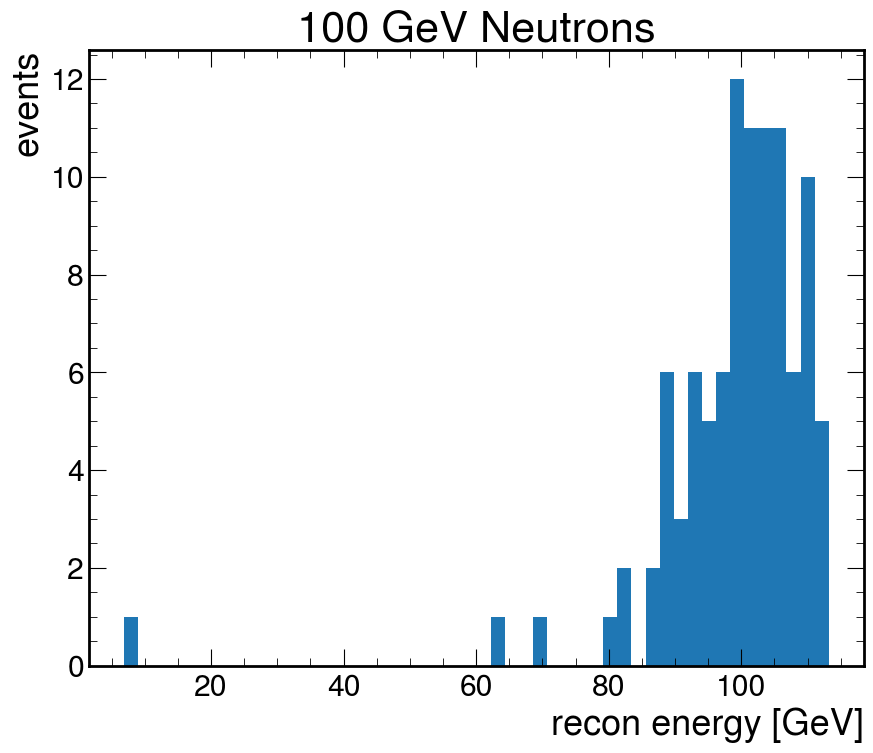

In [58]:
y,x,_=plt.hist(ak.flatten(arrays_sim[("corr",100)]["ReconstructedFarForwardZDCNeutrons.energy"]), bins=50)
plt.xlabel("recon energy [GeV]")
plt.ylabel("events")
x=(x[1:]+x[:-1])/2

plt.title("100 GeV Neutrons")

In [62]:
arrays_sim[("corr",100)]["_HcalFarForwardZDCClusters_hits.index"][0]

<Array [77, 81, 82, 86, 88, ..., 7004, 7005, 7006, 7007] type='1105 * int32'>

In [63]:
arrays_sim[("corr",100)].fields

['HcalFarForwardZDCClusters.type',
 'HcalFarForwardZDCClusters.energy',
 'HcalFarForwardZDCClusters.energyError',
 'HcalFarForwardZDCClusters.time',
 'HcalFarForwardZDCClusters.timeError',
 'HcalFarForwardZDCClusters.nhits',
 'HcalFarForwardZDCClusters.position.x',
 'HcalFarForwardZDCClusters.position.y',
 'HcalFarForwardZDCClusters.position.z',
 'HcalFarForwardZDCClusters.positionError.xx',
 'HcalFarForwardZDCClusters.positionError.yy',
 'HcalFarForwardZDCClusters.positionError.zz',
 'HcalFarForwardZDCClusters.positionError.xy',
 'HcalFarForwardZDCClusters.positionError.xz',
 'HcalFarForwardZDCClusters.positionError.yz',
 'HcalFarForwardZDCClusters.intrinsicTheta',
 'HcalFarForwardZDCClusters.intrinsicPhi',
 'HcalFarForwardZDCClusters.intrinsicDirectionError.xx',
 'HcalFarForwardZDCClusters.intrinsicDirectionError.yy',
 'HcalFarForwardZDCClusters.intrinsicDirectionError.xy',
 'HcalFarForwardZDCClusters.shapeParameters_begin',
 'HcalFarForwardZDCClusters.shapeParameters_end',
 'HcalFar